In [ ]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 4.49 s (started: 2022-09-20 00:34:36 +00:00)


In [ ]:
mkdir images

mkdir: cannot create directory ‘images’: File exists
time: 170 ms (started: 2022-09-20 00:34:43 +00:00)


In [ ]:
import numpy as np
a=np.array([[1,2,3,4,5],[4,5,6,7,8]])
a.ndim

2

time: 5.95 ms (started: 2022-09-20 00:34:45 +00:00)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 2.9 s (started: 2022-09-20 00:34:47 +00:00)


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target=[]
images=[]
flat_data=[]
DATADIR='/content/drive/MyDrive/Data set'
CATEGORIES=['Curve_Images','No_Curve_Images']

for category in CATEGORIES:
    class_num=CATEGORIES.index(category)
    path=os.path.join(DATADIR,category)
    for img in os.listdir(path):
      img_array = imread(os.path.join(path,img))
#       print(img_array.shape)
#       plt.imshow(img_array)
#       break
      img_resized=resize(img_array,(150,150,3))
      flat_data.append(img_resized.flatten())
      images.append(img_resized)
      target.append(class_num)

flat_data=np.array(flat_data) 
target=np.array(target)
images=np.array(images)  

time: 28.5 s (started: 2022-09-20 00:34:52 +00:00)


In [ ]:
len(flat_data[0])

67500

time: 4.36 ms (started: 2022-09-20 00:35:25 +00:00)


In [ ]:
target

array([0, 0, 0, ..., 1, 1, 1])

time: 4.32 ms (started: 2022-09-20 00:35:29 +00:00)


<BarContainer object of 2 artists>

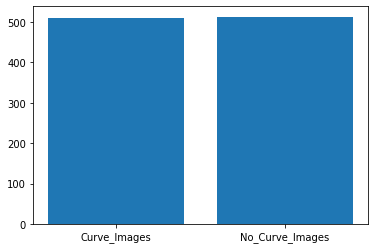

time: 137 ms (started: 2022-09-20 00:35:31 +00:00)


In [ ]:
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,
                                               test_size=0.3,random_state=109)

time: 149 ms (started: 2022-09-20 00:35:35 +00:00)


In [ ]:
#from sklearn.model_selection import GridSearchCV
from sklearn import svm
#param_grid=[
#    {'C':[1,10,100,1000],'kernel':['linear']},
#    {'C':[1,10,100,1000],'gamma':[0.001,0.0001], 'kernel':['rbf']}
  
#]

svc = svm.SVC(probability=True)
#clf = GridSearchCV(svc,param_grid)
svc.fit(x_train,y_train)

SVC(probability=True)

time: 1min 51s (started: 2022-09-20 00:35:39 +00:00)


In [ ]:
y_pred=svc.predict(x_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,

time: 20.8 s (started: 2022-09-20 00:37:36 +00:00)


In [ ]:
y_test

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,

time: 6.4 ms (started: 2022-09-20 00:38:00 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 638 µs (started: 2022-09-20 00:38:04 +00:00)


In [ ]:
accuracy_score(y_pred,y_test)

0.9025974025974026

time: 5.39 ms (started: 2022-09-20 00:38:06 +00:00)


In [ ]:
confusion_matrix(y_pred,y_test)

array([[141,  21],
       [  9, 137]])

time: 9.62 ms (started: 2022-09-20 00:38:19 +00:00)


In [ ]:
import pickle
pickle.dump(svc,open('img_model.p','wb'))

time: 1.18 s (started: 2022-09-20 00:38:21 +00:00)


In [ ]:
model=pickle.load(open('img_model.p','rb'))


time: 155 ms (started: 2022-09-20 00:38:22 +00:00)


In [ ]:
# import random
# idx=random.randint(0,len(x_train))
# plt.imshow(x_train[idx, :])

time: 610 µs (started: 2022-09-20 00:38:25 +00:00)


(256, 256, 3)
PREDICTED OUTPUT: Curve_Images


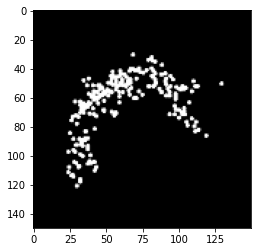

time: 355 ms (started: 2022-09-20 00:40:02 +00:00)


In [ ]:
flat_data=[]
# url=input('Enter')
img=imread("//content//drive//MyDrive//Data set//Curve_Images//FJI_AA_467_6_1_3.png")
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]

print(f'PREDICTED OUTPUT: {y_out}' )